In [1]:
#Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

#Set pandas to show all columns
pd.set_option('display.max_columns', None)

In [2]:
#Read CSV
raw_data_df = pd.read_csv('../healthcare-dataset-stroke-data.csv')
raw_data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#Check for age outliers
raw_data_df.sort_values(by='age', ascending=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3108,53252,Male,82.00,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
188,30184,Male,82.00,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
1515,72474,Female,82.00,0,0,Yes,Govt_job,Rural,58.30,20.4,never smoked,0
1412,62452,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,0
1951,1460,Female,82.00,0,0,Yes,Private,Urban,99.68,22.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [4]:
#Check for BMI outliers
raw_data_df.sort_values(by='bmi', ascending=False).head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0


In [5]:
#drop rows with BMI over 60
raw_data_df_filtered = raw_data_df[raw_data_df['bmi']<60]

raw_data_df_filtered.sort_values(by='bmi', ascending=False).head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3588,23047,Male,43.0,0,0,Yes,Private,Urban,100.16,59.7,never smoked,0
3060,32604,Male,49.0,0,0,Yes,Self-employed,Rural,215.81,58.1,never smoked,0
4351,63915,Female,39.0,0,0,Yes,Private,Urban,87.39,57.9,never smoked,0
1898,25405,Male,62.0,0,0,Yes,Govt_job,Urban,187.52,57.7,never smoked,0
715,3590,Female,28.0,1,0,No,Private,Rural,80.40,57.5,never smoked,0


In [6]:
#Check for null values
raw_data_df_filtered.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
#Check for data imbalance in stroke column
raw_data_df_filtered['stroke'].value_counts()

0    4687
1     209
Name: stroke, dtype: int64

In [8]:
#Use Get_Dummies function to encode all variables (change from text to numeric)

dummies_df = pd.get_dummies(data = raw_data_df_filtered, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
dummies_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [9]:
#drop ID Column

dummies_df = dummies_df.drop(columns = 'id')

In [10]:
#Drop all rows with null values in any column
clean_df = dummies_df.dropna(axis = 0, how ='any')
clean_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [11]:
#Build X and y dataframes for training and testing machine learning model
#original code for specifying y:
y = clean_df['stroke']

#using ravel to specify y:
#y = clean_df['stroke'].ravel()

X = clean_df.drop(columns = 'stroke')


In [12]:
#Use random oversampler to address data imbalance
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_res, y_res = ros.fit_resample(X,y)

In [13]:
#Split the data into training and testing set
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, random_state=1)

In [14]:
# Scale the Data

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_res_train)

# Transform the training data using the scaler
X_res_train_scaled = X_scaler.transform(X_res_train)

# Transform the testing data using the scaler
X_res_test_scaled = X_scaler.transform(X_res_test)

<h3>1. Random Forest Model</h3>

<h5> Model 1.1. All columns included </h5>

In [15]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [16]:
 # Fitting the model
rf_model = rf_model.fit(X_res_train_scaled, y_res_train)

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_res_test_scaled)

In [18]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_res_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_res_test, predictions)

In [19]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_res_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1140,15
Actual 1,0,1189


Accuracy Score : 0.9936006825938567
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1155
           1       0.99      1.00      0.99      1189

    accuracy                           0.99      2344
   macro avg       0.99      0.99      0.99      2344
weighted avg       0.99      0.99      0.99      2344



In [20]:
# Calculate feature importance
importances = rf_model.feature_importances_
# Sort features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3578342896518154, 'age'),
 (0.2051047972946033, 'avg_glucose_level'),
 (0.16290424230360115, 'bmi'),
 (0.037797044250526775, 'hypertension'),
 (0.026203389419070206, 'ever_married_Yes'),
 (0.022595624748008677, 'heart_disease'),
 (0.022479677863829768, 'ever_married_No'),
 (0.01819213520513506, 'smoking_status_never smoked'),
 (0.015143390813067798, 'work_type_Self-employed'),
 (0.01427855016609913, 'work_type_Private'),
 (0.014075417822084414, 'smoking_status_Unknown'),
 (0.013847658928786451, 'smoking_status_formerly smoked'),
 (0.013726302007645887, 'Residence_type_Urban'),
 (0.013706618953188589, 'Residence_type_Rural'),
 (0.01343653948424267, 'gender_Female'),
 (0.013411859443742775, 'gender_Male'),
 (0.013087996868193242, 'smoking_status_smokes'),
 (0.011916773132351184, 'work_type_Govt_job'),
 (0.010178772946529515, 'work_type_children'),
 (7.891869747788132e-05, 'work_type_Never_worked'),
 (0.0, 'gender_Other')]

<h5>Model 1.2. Optimize model by dropping work type, marriage, and gender columns prior to splitting data</h5>

In [21]:
#Display clean_df
clean_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [22]:
clean_df_rf2 = clean_df.drop(columns = ['gender_Female', 
                                      'gender_Male',
                                      'gender_Other',
                                      'ever_married_No',
                                      'ever_married_Yes',
                                      'work_type_Govt_job', 
                                      'work_type_Never_worked', 
                                      'work_type_Private', 
                                      'work_type_Self-employed', 
                                      'work_type_children'])
clean_df_rf2


y_rf2 = clean_df_rf2['stroke']

X_rf2 = clean_df_rf2.drop(columns = 'stroke')

In [23]:
#Use random oversampler to address data imbalance
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_res_rf2, y_res_rf2 = ros.fit_resample(X_rf2, y_rf2)

In [24]:
#Split the data into training and testing set
X_res_rf2_train, X_res_rf2_test, y_res_rf2_train, y_res_rf2_test = train_test_split(X_res_rf2, y_res_rf2, random_state=99)

In [25]:
# Scale the Data

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_res_rf2_train)

# Transform the training data using the scaler
X_res_rf2_train_scaled = X_scaler.transform(X_res_rf2_train)

# Transform the testing data using the scaler
X_res_rf2_test_scaled = X_scaler.transform(X_res_rf2_test)

In [26]:
 # Create a random forest classifier
rf2_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [27]:
 # Fitting the model
rf2_model = rf2_model.fit(X_res_rf2_train_scaled, y_res_rf2_train)

In [28]:
# Making predictions using the testing data
predictions_rf2 = rf2_model.predict(X_res_rf2_test_scaled)

In [29]:
#  Calculating the confusion matrix
# cm = confusion_matrix(y_res_rf2_test, predictions_rf2)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# Calculating the accuracy score
acc_score = accuracy_score(y_res_rf2_test, predictions_rf2)

In [30]:
 # Displaying results
# print("Confusion Matrix")
# display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_res_rf2_test, predictions_rf2))

Accuracy Score : 0.9893344709897611
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1172
           1       0.98      1.00      0.99      1172

    accuracy                           0.99      2344
   macro avg       0.99      0.99      0.99      2344
weighted avg       0.99      0.99      0.99      2344



In [31]:
# Calculate feature importance
importances = rf2_model.feature_importances_
# Sort features by their importance
sorted(zip(rf2_model.feature_importances_, X_rf2.columns), reverse=True)

[(0.4139219058669575, 'age'),
 (0.24713333218065264, 'avg_glucose_level'),
 (0.2042565840178538, 'bmi'),
 (0.035353569542869646, 'hypertension'),
 (0.023300265586485035, 'heart_disease'),
 (0.015345361274775425, 'smoking_status_never smoked'),
 (0.014470767980213255, 'smoking_status_Unknown'),
 (0.012130779584469504, 'smoking_status_formerly smoked'),
 (0.01150481468689528, 'Residence_type_Urban'),
 (0.011362926090232699, 'smoking_status_smokes'),
 (0.011219693188595309, 'Residence_type_Rural')]

<h3>2. Logistic Regression Models</h3>

<h5>Model 2.1: All Columns Included</h5>

In [32]:
#Instantiate Logistic Regression Model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [33]:
#Fit the model using training data
classifier.fit(X_res_train_scaled, y_res_train)

LogisticRegression(max_iter=200, random_state=1)

In [34]:
print(f"Training Data Score: {classifier.score(X_res_train_scaled, y_res_train)}")
print(f"Testing Data Score: {classifier.score(X_res_test_scaled, y_res_test)}")

Training Data Score: 0.7788051209103841
Testing Data Score: 0.7726109215017065


In [35]:
#Create confusion matrix
y_pred = classifier.predict(X_res_test_scaled)
confusion_matrix = confusion_matrix(y_res_test, y_pred)
print(confusion_matrix)


[[866 289]
 [244 945]]


In [36]:
#Create classification report
print(classification_report(y_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1155
           1       0.77      0.79      0.78      1189

    accuracy                           0.77      2344
   macro avg       0.77      0.77      0.77      2344
weighted avg       0.77      0.77      0.77      2344



<h5>Model 2.2: Optimize model by dropping marriage and work type variables from dataset</h5>

In [37]:
#display clean dataframe with all columns
clean_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [38]:
#Build X and y dataframes for training and testing machine learning model. 
#Drop married and work type columns from dataset before splitting into training and test sets 

clean_df_2 = clean_df.drop(columns = ['ever_married_Yes', 
                                      'ever_married_No', 
                                      'work_type_Govt_job', 
                                      'work_type_Never_worked', 
                                      'work_type_Private', 
                                      'work_type_Self-employed', 
                                      'work_type_children'])
clean_df_2


y_2 = clean_df_2['stroke']

X_2 = clean_df_2.drop(columns = 'stroke')

In [39]:
#Use random oversampler to address data imbalance
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_res_2, y_res_2 = ros.fit_resample(X_2,y_2)

In [40]:
#Split the data into training and testing set
X_res_2_train, X_res_2_test, y_res_2_train, y_res_2_test = train_test_split(X_res_2, y_res_2, random_state=2)

In [41]:
# Scale the Data

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_res_2_train)

# Transform the training data using the scaler
X_res_2_train_scaled = X_scaler.transform(X_res_2_train)

# Transform the testing data using the scaler
X_res_2_test_scaled = X_scaler.transform(X_res_2_test)

In [42]:
#Instantiate Logistic Regression Model
classifier_2 = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=11)
classifier_2

LogisticRegression(max_iter=200, random_state=11)

In [43]:
#Fit the model using training data
classifier_2.fit(X_res_2_train_scaled, y_res_2_train)

LogisticRegression(max_iter=200, random_state=11)

In [44]:
print(f"Training Data Score: {classifier_2.score(X_res_2_train_scaled, y_res_2_train)}")
print(f"Testing Data Score: {classifier_2.score(X_res_2_test_scaled, y_res_2_test)}")

Training Data Score: 0.7716927453769559
Testing Data Score: 0.7751706484641638


In [45]:
#Create classification report
print(classification_report(y_res_2_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49      1193
           1       0.49      0.52      0.50      1151

    accuracy                           0.49      2344
   macro avg       0.49      0.49      0.49      2344
weighted avg       0.50      0.49      0.49      2344



<h5>Model 2.3: Optimize model by dropping gender, work type, and marriage columns prior to splitting into testing and training datasets</h5>

In [46]:
#display clean dataframe with all columns
clean_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [47]:
#Build X and y dataframes for training and testing machine learning model. 
#Drop gender, work type, and marriage columns from dataset before splitting into training and test sets 

clean_df_3 = clean_df.drop(columns = ['gender_Female', 
                                      'gender_Male',
                                      'gender_Other',
                                      'ever_married_No',
                                      'ever_married_Yes',
                                      'work_type_Govt_job', 
                                      'work_type_Never_worked', 
                                      'work_type_Private', 
                                      'work_type_Self-employed', 
                                      'work_type_children'])
clean_df_3


y_3 = clean_df_3['stroke']

X_3 = clean_df_3.drop(columns = 'stroke')

In [48]:
#Use random oversampler to address data imbalance
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_res_3, y_res_3 = ros.fit_resample(X_3, y_3)

In [49]:
#Split the data into training and testing set
X_res_3_train, X_res_3_test, y_res_3_train, y_res_3_test = train_test_split(X_res_3, y_res_3, random_state=4)

In [50]:
# Scale the Data

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_res_3_train)

# Transform the training data using the scaler
X_res_3_train_scaled = X_scaler.transform(X_res_3_train)

# Transform the testing data using the scaler
X_res_3_test_scaled = X_scaler.transform(X_res_3_test)

In [51]:
#Instantiate Logistic Regression Model
classifier_3 = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=5)
classifier_3

LogisticRegression(max_iter=200, random_state=5)

In [52]:
#Fit the model using training data
classifier_3.fit(X_res_3_train_scaled, y_res_3_train)

LogisticRegression(max_iter=200, random_state=5)

In [53]:
print(f"Training Data Score: {classifier_3.score(X_res_3_train_scaled, y_res_3_train)}")
print(f"Testing Data Score: {classifier_3.score(X_res_3_test_scaled, y_res_3_test)}")

Training Data Score: 0.7714082503556188
Testing Data Score: 0.7636518771331058


In [54]:
#Create confusion matrix
y_pred = classifier_3.predict(X_res_3_test_scaled)
# confusion_matrix = confusion_matrix(y_res_test, y_pred)
# print(confusion_matrix)

In [55]:
#Create classification report
print(classification_report(y_res_3_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1154
           1       0.75      0.81      0.78      1190

    accuracy                           0.76      2344
   macro avg       0.77      0.76      0.76      2344
weighted avg       0.77      0.76      0.76      2344



<h3>3. K Nearest Neighbors Models</h3>

<h5>Model 3.1: All columns included 

In [56]:
#Display clean_df
clean_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [57]:
#Build X and y dataframes for training and testing machine learning model
y_4 = clean_df['stroke']

X_4 = clean_df.drop(columns = 'stroke')

In [58]:
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_res_4, y_res_4 = ros.fit_resample(X_4, y_4)

In [59]:
#Split the data into training and testing set
X_res_4_train, X_res_4_test, y_res_4_train, y_res_4_test = train_test_split(X_res_4, y_res_4, random_state=6)

In [60]:
# Scale the Data for KNN model

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_res_4_train)

# Transform the training data using the scaler
X_res_4_train_scaled = X_scaler.transform(X_res_4_train)

# Transform the testing data using the scaler
X_res_4_test_scaled = X_scaler.transform(X_res_4_test)

In [61]:
#Build KNN model with initial k-value of 3
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [62]:
 # Train the model using the training data
knn_3.fit(X_res_4_train_scaled, y_res_4_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
#Predict stroke values based on test dataset
y_pred = knn_3.predict(X_res_4_test_scaled)

In [64]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_res_4_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1180
           1       0.93      1.00      0.96      1164

    accuracy                           0.96      2344
   macro avg       0.96      0.96      0.96      2344
weighted avg       0.96      0.96      0.96      2344



In [65]:
#Find optimal value for K
k_values = [i for i in range (1,31)]
k_scores = []

X = scaler.fit_transform(X)

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=5)
    k_scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

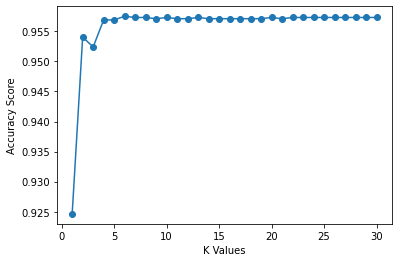

In [66]:
#Plot k values and accuracy scores to find optimal value for K using plot
plt.plot(k_values, k_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [67]:
#Rebuild KNN model with k-value of 4
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [68]:
 # Train the model using the training data
knn_5.fit(X_res_3_train_scaled, y_res_3_train)

KNeighborsClassifier()

In [69]:
#Predict stroke values based on test dataset
y_pred = knn_5.predict(X_res_3_test_scaled)

In [70]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_res_3_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1154
           1       0.88      1.00      0.94      1190

    accuracy                           0.93      2344
   macro avg       0.94      0.93      0.93      2344
weighted avg       0.94      0.93      0.93      2344

